Ejercicio: Interpolar con 10 puntos generados de la función de Runge $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from scipy.interpolate import interp1d
import mjmaLibMat as LM

In [4]:
#Función generadora de puntos
def funcRunge(x):
    nbrRsltd=((1)/(1+25*(x**2)))
    return nbrRsltd

#Rango que se usará en los 2 siguientes ejercicio
nbrMinRunge=-1
nbrMaxRunge=1
print('nbrMinRunge: ',nbrMinRunge)
print('nbrMaxRunge: ',nbrMaxRunge)

nbrMinRunge:  -1
nbrMaxRunge:  1


arrValoresX: 
array([-1.  , -0.78, -0.56, -0.33, -0.11,  0.11,  0.33,  0.56,  0.78,
        1.  ])
arrValoresY: 
array([0.04, 0.06, 0.11, 0.26, 0.76, 0.76, 0.26, 0.11, 0.06, 0.04])


Text(0,0.5,'y')

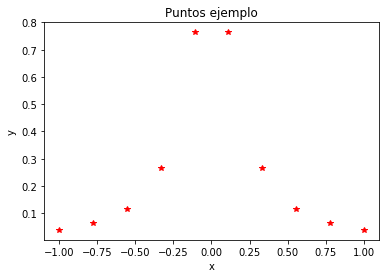

In [5]:
#Ejercicio para 10 puntos
nbrPuntos=10
arrValoresX=np.linspace(nbrMinRunge,nbrMaxRunge,nbrPuntos)
print('arrValoresX: ')
pprint.pprint(arrValoresX)

arrValoresY=funcRunge(arrValoresX)
print('arrValoresY: ')
pprint.pprint(arrValoresY)

plt.title('Puntos ejemplo')
plt.plot(arrValoresX,arrValoresY, 'r*')
plt.xlabel('x')
plt.ylabel('y')

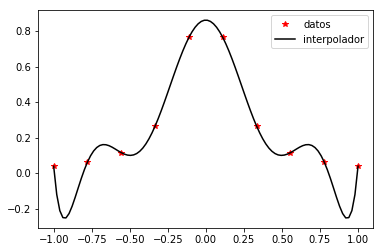

In [6]:
#El tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
nbrGrado = nbrPuntos -1
arrCoeficientes = np.polyfit(arrValoresX,arrValoresY,nbrGrado)

neval = 100
#neval = 100
xeval = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yeval = np.polyval(arrCoeficientes,xeval)

plt.plot(arrValoresX, arrValoresY, 'r*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')

arrValoresX: 
array([-1.  , -1.  , -1.  , -0.99, -0.99, -0.99, -0.99, -0.99, -0.98,
       -0.98, -0.98, -0.98, -0.98, -0.97, -0.97, -0.97, -0.97, -0.97,
       -0.96, -0.96, -0.96, -0.96, -0.96, -0.95, -0.95, -0.95, -0.95,
       -0.95, -0.94, -0.94, -0.94, -0.94, -0.94, -0.93, -0.93, -0.93,
       -0.93, -0.93, -0.92, -0.92, -0.92, -0.92, -0.92, -0.91, -0.91,
       -0.91, -0.91, -0.91, -0.9 , -0.9 , -0.9 , -0.9 , -0.9 , -0.89,
       -0.89, -0.89, -0.89, -0.89, -0.88, -0.88, -0.88, -0.88, -0.88,
       -0.87, -0.87, -0.87, -0.87, -0.87, -0.86, -0.86, -0.86, -0.86,
       -0.86, -0.85, -0.85, -0.85, -0.85, -0.85, -0.84, -0.84, -0.84,
       -0.84, -0.84, -0.83, -0.83, -0.83, -0.83, -0.83, -0.82, -0.82,
       -0.82, -0.82, -0.82, -0.81, -0.81, -0.81, -0.81, -0.81, -0.8 ,
       -0.8 , -0.8 , -0.8 , -0.8 , -0.79, -0.79, -0.79, -0.79, -0.79,
       -0.78, -0.78, -0.78, -0.78, -0.78, -0.77, -0.77, -0.77, -0.77,
       -0.77, -0.76, -0.76, -0.76, -0.76, -0.76, -0.75, -0.75, -0.75,
      

Text(0,0.5,'y')

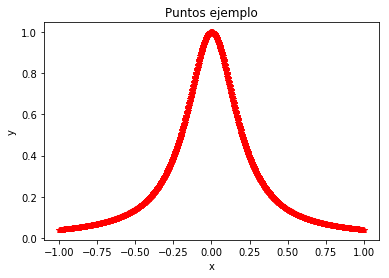

In [7]:
#Ejercicio para 1,000 puntos (El ejercicio era para 10,000 puntos, pero se traba el programa para esa cantidad)
nbrPuntos=1000
arrValoresX=np.linspace(nbrMinRunge,nbrMaxRunge,nbrPuntos)
print('arrValoresX: ')
pprint.pprint(arrValoresX)

arrValoresY=funcRunge(arrValoresX)
print('arrValoresY: ')
pprint.pprint(arrValoresY)

plt.title('Puntos ejemplo')
plt.plot(arrValoresX,arrValoresY, 'r*')
plt.xlabel('x')
plt.ylabel('y')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


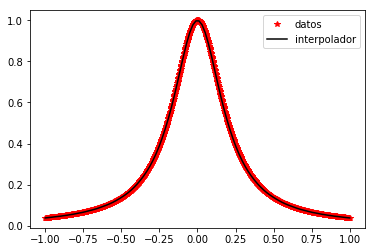

In [8]:
#El tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
nbrGrado = nbrPuntos -1
arrCoeficientes = np.polyfit(arrValoresX,arrValoresY,nbrGrado)

neval = 100
#neval = 100
xeval = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yeval = np.polyval(arrCoeficientes,xeval)

plt.plot(arrValoresX, arrValoresY, 'r*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')

xeval.shape: 100
yeval.shape: 100


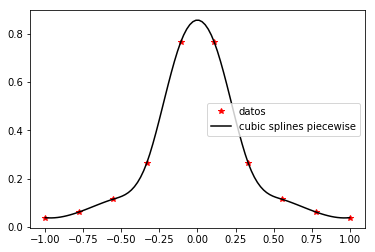

In [9]:
#nbrPuntos
#Disminuiremos el número de intervalos a 10 para aplicar los spline cúbicos y se noten mejor en el plot
arrValoresX=np.linspace(nbrMinRunge,nbrMaxRunge,10)
arrValoresY=funcRunge(arrValoresX)

pw_spline = interp1d(arrValoresX, arrValoresY, kind = 'cubic') #spline piecewise 
neval = 100
xeval = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yeval = pw_spline(xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])
plt.plot(arrValoresX, arrValoresY, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')

Mínimos cuadrados

array([-2.65,  2.03])


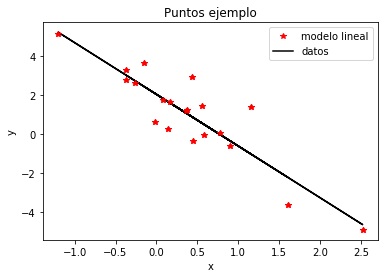

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')

# el tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
#Usaremos ngrado = 1 pues queremos ajustar una recta
ngrado = 1
coeficientes = np.polyfit(x,y,ngrado)

#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
pprint.pprint(coeficientes)

y_ajustadas_numpy = coeficientes[1] + coeficientes[0] * x

plt.plot(x, y_ajustadas_numpy, 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')


array([ 2.03, -2.65])


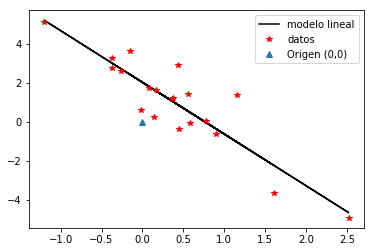

In [11]:
#Solución con QR
#construimos a la matriz A:
A=np.ones((mpoints,2))

A[:,1] = x

Q,R = np.linalg.qr(A)

#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)
pprint.pprint(beta)

y_ajustadas_QR = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

#(Se agrega en el plot un punto en el origen para notar que sí hay intercepto)
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*',0,0,'^')
plt.legend(['modelo lineal','datos','Origen (0,0)'], loc='best')


Modelo sin intercepto
Se ajusta un modelo de la forma: $f(x|\beta) = \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.
Obs: En este caso se elige $\phi_1(x) =x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.
Ejemplo numérico en numpy:
Ejercicio: realizar el ajuste correspondiente para este caso con QR.

array([[-4.47, -1.73],
       [ 0.  ,  3.44]])
array([ 2.03, -2.65])


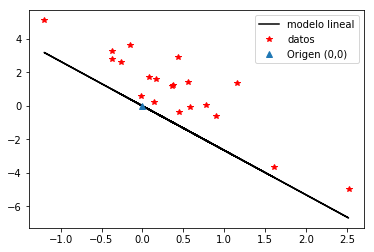

In [12]:
#Solución con QR Ejercicio 

#Solución con QR
#construimos a la matriz A:
A=np.ones((mpoints,2))

A[:,1] = x

Q,R = np.linalg.qr(A)

#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)
pprint.pprint(R)
pprint.pprint(beta)

#Como el ejercicio en sin intercepto, omitimos usar el valor de beta0
y_ajustadas_QR = beta[1]*x

#(Se agrega en el plot un punto en el origen para notar que no hay intercepto)
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*',0,0,'^')
plt.legend(['modelo lineal','datos','Origen (0,0)'], loc='best')


Ejercicio: calcular el ECM de los ajustes anteriores.

In [17]:
########## Calculamos el ECM del ejercicio donde sí hubo intercepto:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

ngrado = 1
coeficientes = np.polyfit(x,y,ngrado)
yAjustEj1 = coeficientes[1] + coeficientes[0] * x

nbrECMEj1=LM.CalcularECM(y,yAjustEj1)

########## Calculamos el ECM del ejercicio donde no hubo intercepto:
A=np.ones((mpoints,2))

A[:,1] = x

Q,R = np.linalg.qr(A)

#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)

#Como el ejercicio en sin intercepto, omitimos usar el valor de beta0
yAjustQR = beta[1]*x

nbrECMEj2=LM.CalcularECM(y,yAjustQR)

print('nbrECMEj1: ',nbrECMEj1)
print('nbrECMEj2: ',nbrECMEj2)
#Se observa que el ejercicio donde sí hubo intercepto, da mejores resultados, pues el ECM es menor


nbrECMEj1:  20.435476838775887
nbrECMEj2:  102.81346133233309


$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$
$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$
$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

Ejercicio: ajustar el modelo 3. Calcular ECM de cada modelo y realizar en una sola gráfica los tres modelos. ¿Cuál es el modelo con menor ECM?

In [27]:
datos = np.loadtxt('datos_para_ipynb_3_minimos_cuadrados.txt', skiprows=1)

Text(0.5,1,'datos')

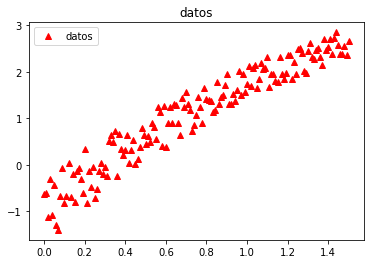

In [19]:
x = datos[:,0]
y = datos[:,1]

plt.plot(x, y, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos')

beta
array([-1.3,  6.2])


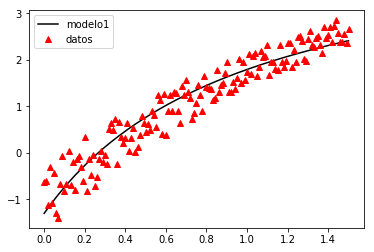

In [23]:
### Modelo 1
phi_1 = lambda var: var/(var+1)

mpoints, = x.shape
A=np.ones((mpoints,2))
A[:,1] = phi_1(x)

Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
print('beta')
pprint.pprint(beta)

yAjusMod1 = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x)

plt.plot(x, yAjusMod1 , 'k-',x, y, 'r^')
plt.legend(['modelo1','datos'], loc='best')

array([-0.69,  3.39, -0.92])


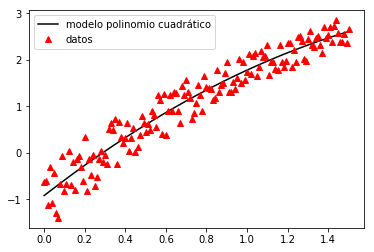

In [26]:
### Modelo 2
#No requerimos construir A pues es un polinomio de grado2 por lo que usamos polyfit de numpy:
ngrado = 2
coeficientes = np.polyfit(x,y,ngrado)

pprint.pprint(coeficientes)

yAjusMod2 = coeficientes[2] + coeficientes[1] * x + coeficientes[0] * x**2

plt.plot(x, yAjusMod2, 'k-',x, y, 'r^')
plt.legend(['modelo polinomio cuadrático','datos'], loc='best')

beta
array([-0.98,  3.96])


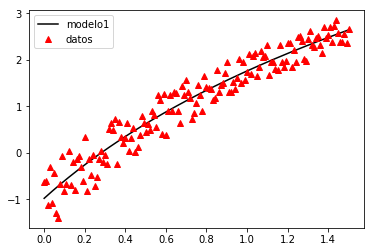

In [30]:
### Modelo 3
phi_3 = lambda var: np.log(var+1)

mpoints, = x.shape
A=np.ones((mpoints,2))
A[:,1] = phi_3(x)

Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
print('beta')
pprint.pprint(beta)

yAjusMod3 = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x)

plt.plot(x, yAjusMod3 , 'k-',x, y, 'r^')
plt.legend(['modelo1','datos'], loc='best')



nbrECMMod1:  12.041297818937323
nbrECMMod2:  11.974386376666109
nbrECMMod3:  12.041297818937323


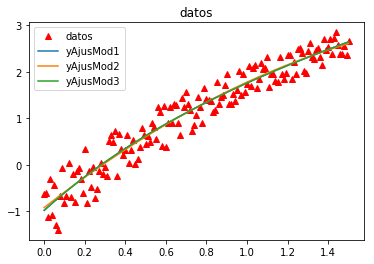

In [39]:
### Comparación de modelos

#plt.plot(x,sin(arrX),'o-',arrX,cos(arrX),'^-')
#plt.plot(x, yAjusMod1 , 'o-',x, yAjusMod2, '^-')

plt.plot(x, y, 'r^', x, yAjusMod1 , '-',x, yAjusMod2 , '-', x, yAjusMod3 , '-')
plt.legend(['datos', 'yAjusMod1', 'yAjusMod2', 'yAjusMod3'], loc='best')
plt.title('datos')

nbrECMMod1=LM.CalcularECM(y,yAjusMod1)
nbrECMMod2=LM.CalcularECM(y,yAjusMod2)
nbrECMMod3=LM.CalcularECM(y,yAjusMod3)

print('nbrECMMod1: ',nbrECMMod1)
print('nbrECMMod2: ',nbrECMMod2)
print('nbrECMMod3: ',nbrECMMod3)
#Se observa que el modelo 2, tiene la menor diferencia de cuadrados




Reconstrucción de imágenes

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.linalg import matrix_rank

(851, 1280)
851


Text(0.5,1,'Ejercicio')

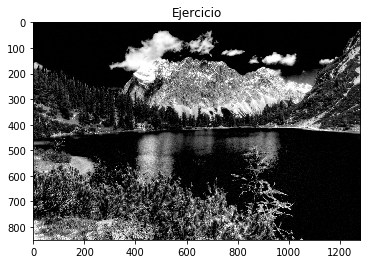

In [252]:
img=plt.imread('paisaje.jpg')
img = img[:,:,0]
print(img.shape)

print(matrix_rank(img))

imgplot = plt.imshow(img, cmap='gray')
plt.title('Ejercicio')

(851, 851)
(851,)
(851, 1280)
(851, 1280)
(851,)
(851, 1280)


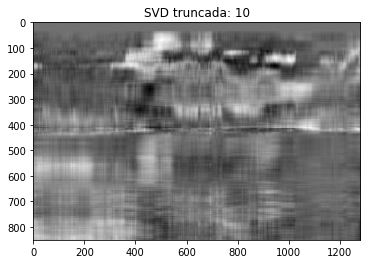

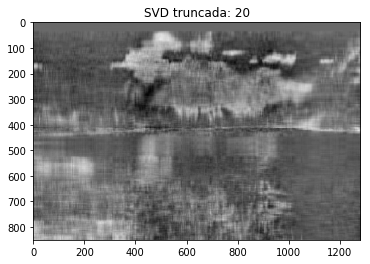

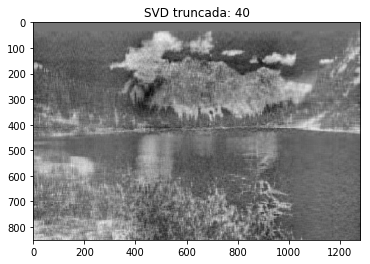

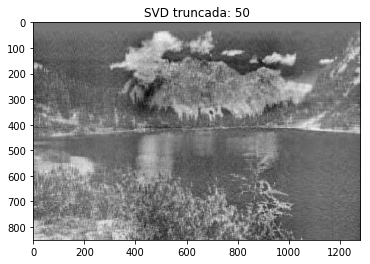

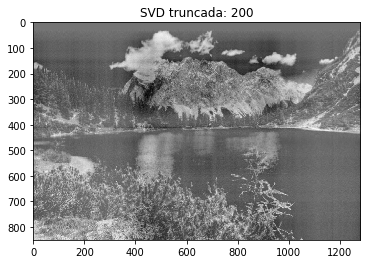

In [253]:
#Aplicamos el SDV a la imagen
U,S,V_T = np.linalg.svd(img, full_matrices=False)

print(U.shape)
print(S.shape)
print(V_T.shape)

img_svd = (U*S)@V_T

print(img_svd.shape)

plt.imshow(img_svd, cmap='gray')

plt.title('Imagen utilizando SVD')

#Usando solo 1 vector singular izquierdo, derecho y singular
print((U[:,1]*S[1]).shape)

img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])

print(img_svd_1.shape)

plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')

#Usando 2 vectores singulares izquierdos, derechos 
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])

plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')

def reconstruir_imagen_n(n, i=1, img=0):
    if i == n:
        return img
    else:
        return img + reconstruir_imagen_n(n, i+1,np.outer((U[:,i]*S[i]),V_T[i,:]))

def img_svd_n(n):
    plt.imshow(reconstruir_imagen_n(n), cmap='gray')
    plt.title('SVD truncada: {}'.format(n))
    plt.show()

img_svd_n(10)
img_svd_n(20)
img_svd_n(40)
img_svd_n(50)
img_svd_n(200) #realizando este mismo ejercicio con el n=rank, la imagen se reconstruiría al 100%.

Ajusta por mínimos cuadrados dos modelos de la forma:

log(y) = log(b) + alog(x)

log(y) = log(b) + alog(x) + c(log(x))^2

al conjunto de datos que se descargan de aquí. Realiza una gráfica que involucre los datos y los dos modelos. Calcula el ECM de ambos modelos y responde ¿cuál es el modelo con menor ECM?

nbrECMMod1:  25.301841635293613
nbrECMMod2:  20.304103842151424


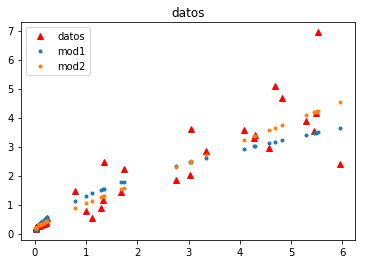

In [182]:
## Cargamos los datos
datos = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)

x = datos[:,0]
y = datos[:,1]

#### Modelo 1
ngrado = 1
coeficientes = np.polyfit(np.log(x),np.log(y),ngrado)
yAjusMod1 = coeficientes[1]  + (coeficientes[0] * np.log(x))

#Quitamos el logaritmo
yAjusMod1=np.exp(yAjusMod1)

#### Modelo 2
ngrado = 2
coeficientes = np.polyfit(np.log(x),np.log(y),ngrado)
yAjusMod2 = coeficientes[2]  + (coeficientes[1] * np.log(x)) + (coeficientes[0] * np.log(x)**2)

#Quitamos el logaritmo
yAjusMod2=np.exp(yAjusMod2)

plt.plot(x, y, 'r^', x, yAjusMod1,'.', x, yAjusMod2,'.')
plt.legend(['datos','mod1','mod2'], loc='best')
plt.title('datos')

nbrECMMod1=LM.CalcularECM(y,yAjusMod1)
nbrECMMod2=LM.CalcularECM(y,yAjusMod2)

print('nbrECMMod1: ',nbrECMMod1)
print('nbrECMMod2: ',nbrECMMod2)
#Se observa que el modelo 2, tiene la menor diferencia de cuadrados



Consulta la página del INEGI para obtener los datos de la población total de México en los años de 1950 a 2010 (cada 10 años) y ajusta modelos polinomiales de grados: 1, 3, 6 y spline's cúbicos. Realiza una gráfica que involucre los datos y las curvas de cada modelo. Estima la población en los años 1940, 1995 y 2020 para cada modelo y calcula tu error de estimación si la población en México en 1940 era de 19,653,552 y en 1995 de 91,158,290. Compara tu estimación para 2020 con los datos de 2018.

In [244]:
#Información del INEGI
nbrPob1950=25791017
nbrPob1960=34923129
nbrPob1970=48225238
nbrPob1980=66846833
nbrPob1990=81249645
nbrPob2000=97483412
nbrPob2010=112336538

#Años adicionales
nbrPob1940=19653552
nbrPob1995=91158290
nbrPob2015=119938473

arrValoresX: 
array([1950, 1960, 1970, 1980, 1990, 2000, 2010])
arrValoresY: 
array([ 25791017,  34923129,  48225238,  66846833,  81249645,  97483412,
       112336538])


Text(0,0.5,'y')

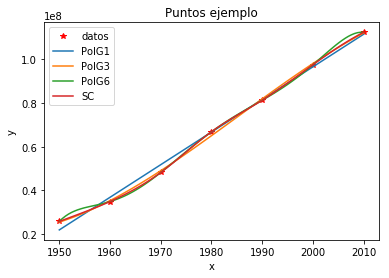

In [245]:
#Ejercicio para 10 puntos
arrValoresX=np.array([1950,1960,1970,1980,1990,2000,2010])
print('arrValoresX: ')
pprint.pprint(arrValoresX)

arrValoresY=np.array([nbrPob1950,nbrPob1960,nbrPob1970,nbrPob1980,nbrPob1990,nbrPob2000,nbrPob2010])
print('arrValoresY: ')
pprint.pprint(arrValoresY)

neval = 100

ngrado = 1
coeficientesG1 = np.polyfit(arrValoresX,arrValoresY,ngrado)
xevalG1 = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yevalG1 = np.polyval(coeficientesG1,xeval)

ngrado = 3
coeficientesG3 = np.polyfit(arrValoresX,arrValoresY,ngrado)
xevalG3 = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yevalG3 = np.polyval(coeficientesG3,xeval)

ngrado = 6
coeficientesG6 = np.polyfit(arrValoresX,arrValoresY,ngrado)
xevalG6 = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yevalG6 = np.polyval(coeficientesG6,xeval)

#Splines
pw_spline = interp1d(arrValoresX, arrValoresY, kind = 'cubic') #spline piecewise 
xevalSC = np.linspace(min(arrValoresX),max(arrValoresX), neval)
yevalSC = pw_spline(xevalSC)

plt.title('Puntos ejemplo')
plt.plot(arrValoresX,arrValoresY, 'r*', xevalG1, yevalG1, '-', xevalG3, yevalG3, '-', xevalG6, yevalG6, '-', xevalSC, yevalSC, '-')
plt.legend(['datos','PolG1', 'PolG3', 'PolG6','SC'], loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [248]:
#Estimaciones
np.set_printoptions(precision = 2)

#Para el polinomio de grado1
print('Estimaciones para 1940')
nbrEst1940G1=np.polyval(coeficientesG1, 1940)
nbrEst1940G3=np.polyval(coeficientesG3, 1940)
nbrEst1940G6=np.polyval(coeficientesG6, 1940)
print('nbrEst1940G1: ',nbrEst1940G1)
print('nbrEst1940G3: ',nbrEst1940G3)
print('nbrEst1940G6: ',nbrEst1940G6)
print('nbrPob1940: ',nbrPob1940)
print('Diferenica G1: ', (nbrPob1940-nbrEst1940G1))
print('Diferenica G2: ', (nbrPob1940-nbrEst1940G3))
print('Diferenica G3: ', (nbrPob1940-nbrEst1940G6))
print('')
print('')

#Con Splines cúbicos, no se puede extrapolar

#Para 1995
print('Estimaciones para 1995')
nbrEst1995G1=np.polyval(coeficientesG1, 1995)
nbrEst1995G3=np.polyval(coeficientesG3, 1995)
nbrEst1995G6=np.polyval(coeficientesG6, 1995)
nbrEst1995SC=pw_spline(1995)
print('nbrEst1995G1: ',nbrEst1995G1)
print('nbrEst1995G3: ',nbrEst1995G3)
print('nbrEst1995G6: ',nbrEst1995G6)
print('nbrEst1995SC: ',nbrEst1995SC)
print('nbrPob1995: ',nbrPob1995)
print('Diferenica G1: ', nbrPob1995-nbrEst1995G1)
print('Diferenica G2: ', nbrPob1995-nbrEst1995G3)
print('Diferenica G3: ', nbrPob1995-nbrEst1995G6)
print('Diferenica SC: ', nbrPob1995-nbrEst1995SC)
print('')
print('')

#Para 2020
print('Estimaciones para 2020 (la comparación la realizamos contra 2015)')
nbrEst2020G1=np.polyval(coeficientesG1, 2020)
nbrEst2020G3=np.polyval(coeficientesG3, 2020)
nbrEst2020G6=np.polyval(coeficientesG6, 2020)
print('nbrEst2020G1: ',nbrEst2020G1)
print('nbrEst2020G3: ',nbrEst2020G3)
print('nbrEst2020G6: ',nbrEst2020G6)
print('Diferenica G1: ', nbrPob2015-nbrEst2020G1)
print('Diferenica G3: ', nbrPob2015-nbrEst2020G3)
print('Diferenica G6: ', nbrPob2015-nbrEst2020G6)
print('')
print('')


Estimaciones para 1940
nbrEst1940G1:  7010610.857143402
nbrEst1940G3:  21024893.29248047
nbrEst1940G6:  -67589632.0
nbrPob1940:  19653552
Diferenica G1:  12642941.142856598
Diferenica G2:  -1371341.2924804688
Diferenica G3:  87243184.0


Estimaciones para 1995
nbrEst1995G1:  89074841.14285755
nbrEst1995G3:  90138305.9663086
nbrEst1995G6:  88470016.0
nbrEst1995SC:  89101821.60267857
nbrPob1995:  91158290
Diferenica G1:  2083448.8571424484
Diferenica G2:  1019984.0336914062
Diferenica G3:  2688274.0
Diferenica SC:  2056468.3973214328


Estimaciones para 2020 (la comparación la realizamos contra 2015)
nbrEst2020G1:  126376764.00000048
nbrEst2020G3:  122312708.42919922
nbrEst2020G6:  37750784.0
Diferenica G1:  -6438291.000000477
Diferenica G3:  -2374235.4291992188
Diferenica G6:  82187689.0


